In [37]:
import numpy as np 
import matplotlib.pyplot as plt 


In [68]:
def get_sin_cos(theta):
    return (np.cos(theta), np.sin(theta))

def rad2deg(rad):
    return np.array(rad) * (180.0/np.pi)

def deg2rad(deg):
    return np.array(deg) * (np.pi/180.0)

def rotationX(theta):
    sin_theta, cos_theta = get_sin_cos(theta)
    return np.array([[1,0,0,],
                    [0,  cos_theta, sin_theta ],
                    [0, -sin_theta, cos_theta ]])

def rotationY(theta):
    sin_theta, cos_theta = get_sin_cos(theta)
    return np.array([[cos_theta,0, -sin_theta],
                    [0, 1, 0 ],
                    [sin_theta, 0, cos_theta ]])

def rotationZ(theta):
    sin_theta, cos_theta = get_sin_cos(theta)
    return np.array([[cos_theta , sin_theta, 0  ],
                    [-sin_theta , cos_theta, 0  ],
                    [0, 0, 1 ]])

In [69]:

def rotationEulerXYZ(attituded_xyz):
    Rx = rotationX(attituded_xyz[0])
    Ry = rotationY(attituded_xyz[1])
    Rz = rotationZ(attituded_xyz[2])    
    R = np.matmul(Rx, np.matmul(Ry, Rz))
    return R

def eulerAngleRatesXYZ(attitude, omega_body):
    phi = attitude[0]
    theta = attitude[1]
    tan_theta = np.tan(theta)
    cos_theta = np.cos(theta)
    sin_phi = np.sin(phi)
    cos_phi = np.cos(phi)

    E = np.array([ [1, tan_theta * sin_phi, tan_theta * cos_phi]
                  ,[0, cos_phi            , sin_phi]
                  ,[0, sin_phi/cos_theta  , cos_phi/cos_theta]])
    

    return np.matmul(E, omega_body)

def eulerIntegration(x, xdot, dt):
    return x + xdot * dt

def linearInterpolate(R0, R1, t):
    return (R0 * (1-t) + R1 * t )

In [54]:
def plot_data(attitude, omega_body, dt):
    time = []
    phi = []
    the =  []
    psi = []

    for t in np.arange(0, 20, dt):
        attitude_dot = eulerAngleRatesXYZ(attitude, omega_body)
        attitude = eulerIntegration(attitude, attitude_dot, dt)

        time.append(t)
        phi.append(rad2deg(attitude[0]))
        the.append(rad2deg(attitude[1]))
        psi.append(rad2deg(attitude[2]))    

    plt.plot(time, phi, label="roll")
    plt.plot(time, the, label="pitch")
    plt.plot(time, psi, label="yaw")
    plt.legend()
    #plt.savefig("attitude.png")

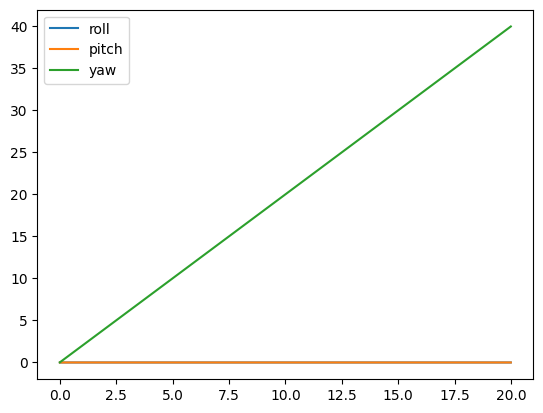

In [56]:
attitude = deg2rad([0,0,0])
omega_body = deg2rad([0,0,2])  # yawing on the z axis at 5degrees per second

dt = 0.01
plot_data(attitude, omega_body, dt)


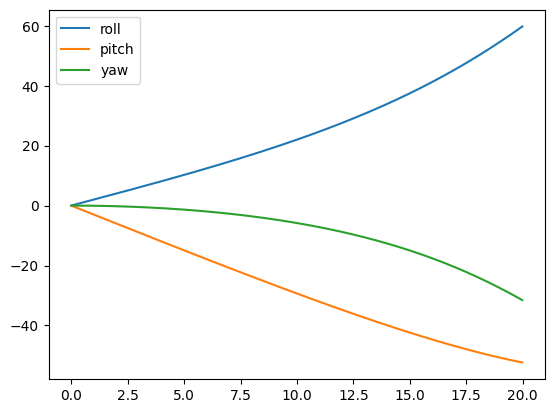

In [55]:
attitude = deg2rad([0,0,0])
omega_body = deg2rad([2,-3,0])  # yawing on the z axis at 5degrees per second

dt = 0.01
plot_data(attitude, omega_body, dt)


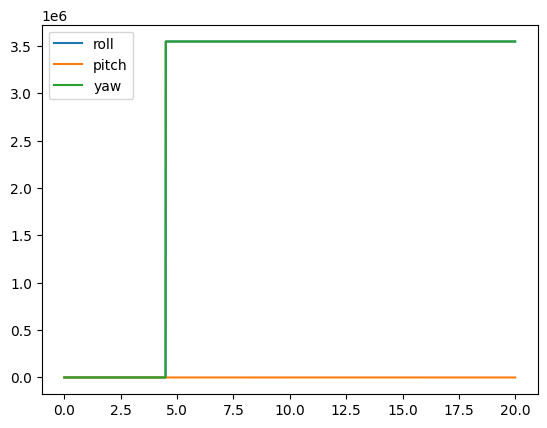

In [58]:
attitude = deg2rad([0.00001,0,0])
omega_body = deg2rad([0,20,0])  # yawing on the z axis at 5degrees per second

dt = 0.01
plot_data(attitude, omega_body, dt)

# rotation rate equations break down at singularity

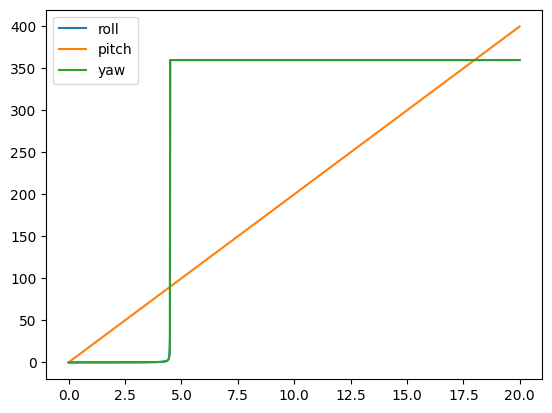

In [59]:
attitude = deg2rad([0.1,0,0])
omega_body = deg2rad([0,20,0])  # yawing on the z axis at 5degrees per second

dt = 0.01
plot_data(attitude, omega_body, dt)
# as pitch hits 90 degrees yaw goes to up really large (0, 360)
# problem with sigularity with in rotations

In [71]:
def print_euler(title, att):
    print(f"{title} {att[0]} {att[1]} {att[2]}")

In [75]:
attitude0 = deg2rad([0,0,0])
attitude1 = deg2rad([-30,45,135])



print_euler("Start", rad2deg(attitude0))
print_euler("End", rad2deg(attitude1))

att_interp = linearInterpolate(attitude0, attitude1, 0.5)  # half way
print_euler("Interp t=0.5", rad2deg(att_interp))


att_interp = linearInterpolate(attitude0, attitude1, 0.75) # 3/4 
print_euler("Interp t=0.9", rad2deg(att_interp))


att_interp = linearInterpolate(attitude0, attitude1, 0.90)
print_euler("Interp t=0.9", rad2deg(att_interp))



Start 0.0 0.0 0.0
End -29.999999999999996 45.0 135.0
Interp t=0.5 -14.999999999999998 22.5 67.5
Interp t=0.9 -22.5 33.75 101.25
Interp t=0.9 -27.0 40.5 121.5
